# Numpy

Numpy is a python package for numerical computations. The main data structure is the *array*. As opposed to python lists, all elements of an array have the same type, and arithmetic operations are defined as you would expect for vectors and matrices in mathematics. 

Here are some examples  of how to create arrays:

In [7]:
import numpy as np
zz = np.zeros(10000)
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
b = np.arange(10)

*Exercise*: Create a sequence of numbers with np.arange(), starting with 0 and up to (exclusively) 6, with step length 1.

In [1]:
3 + 4

7

A similar method for creating arrays is numpy.linspace(). 

*Exercise*: Create a sequence of numbers with np.linspace(), starting with 0 and up to (exclusively) 0.6, with step length 0.1. 

In [8]:
np.linspace?

## Sine functions

Numpy can be used to create a number of interesting signals, like sine waves. The function follows the equation  $y(t) = A\sin(\omega t)$ mit $\omega = 2\pi f$, where $f$ is the frequency, $A$ is the maximum amplitude and $t$ is time. 

The interesting property of many numpy functions is the fact that they work directly on arrays. This means, the input of the function np.sin() can be an array, and the function then calculates the sine for each element in the array. 

This is generally the way numpy works: All functions and arithmetic operations work directly on arrays. For example, the multiplication of a scalar and an array is the scalar vector multipliction, i.e. each element of the array is multiplied by the scalar. 

*Execise*: Create a sine wave with frequency 2Hz, duration of 1s, amplitude of 0.3 and a sampling frequency of 44.1 Hz.


# Signal processing
## Discrete convolution
See https://en.wikipedia.org/wiki/Convolution

The convolution can be used for filtering signals. Consider the following signals (filter kernels):

In [5]:
import numpy as np
from scipy.stats import norm
low = norm.pdf(np.arange(-0.5,0.6,0.1))
high = -norm.pdf(np.arange(1,20),loc=10,scale=10)
high[10] = 0.9
diff = np.array([-1,1])

In [6]:
low

array([0.35206533, 0.36827014, 0.38138782, 0.39104269, 0.39695255,
       0.39894228, 0.39695255, 0.39104269, 0.38138782, 0.36827014,
       0.35206533])

Let us plot these kernels.

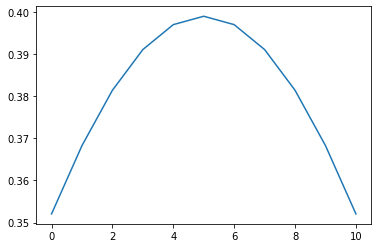

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(low)


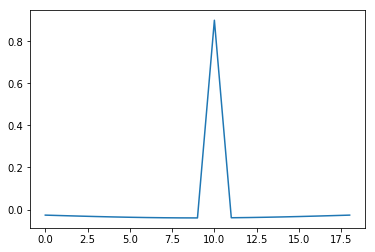

In [20]:
plt.plot(high)

### Exercise

Filter the following signals with high- low- and band pass filters and explain the result. Use the function `np.signal.convolve`. 

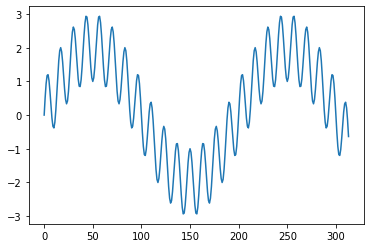

In [13]:
from scipy import signal


sig=np.sin(np.arange(0,3.14,0.01)*15 * np.pi)+2*np.sin(np.arange(0,3.14,0.01) * np.pi)



## Discrete Fourier Transform
* Idea: Represent the signal in a new basis
* Use sine and cosine functions as basis elements
* change of basis = matrix manipulation

### Exercise

* Create the basis transform matrix for the signal given below
* Compute the DFT of that signal
* Plot magnitude and phase of the result
* Compute the DFT of the high-and low pass filtered signal, and explain the result